In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

In [2]:
dataset = pd.read_csv("../input/iris/Iris.csv")
df = dataset.copy()
df.sample(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
16,17,5.4,3.9,1.3,0.4,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica


## Exploratory Data Analysis and Visualization


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.drop(columns="Id",inplace=True)

In [7]:
df.duplicated().sum()

3

In [8]:
df = df.drop_duplicates()

In [9]:
df.skew()

SepalLengthCm    0.292560
SepalWidthCm     0.324351
PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
dtype: float64

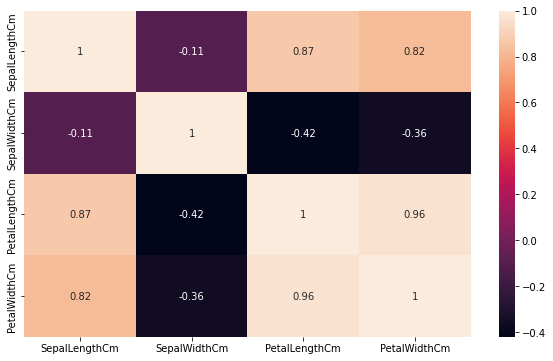

In [10]:
sns.heatmap(df.corr(),annot=True);

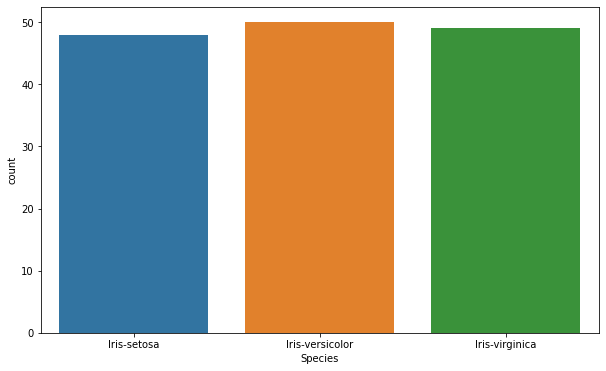

In [11]:
sns.countplot(data=df,x="Species");

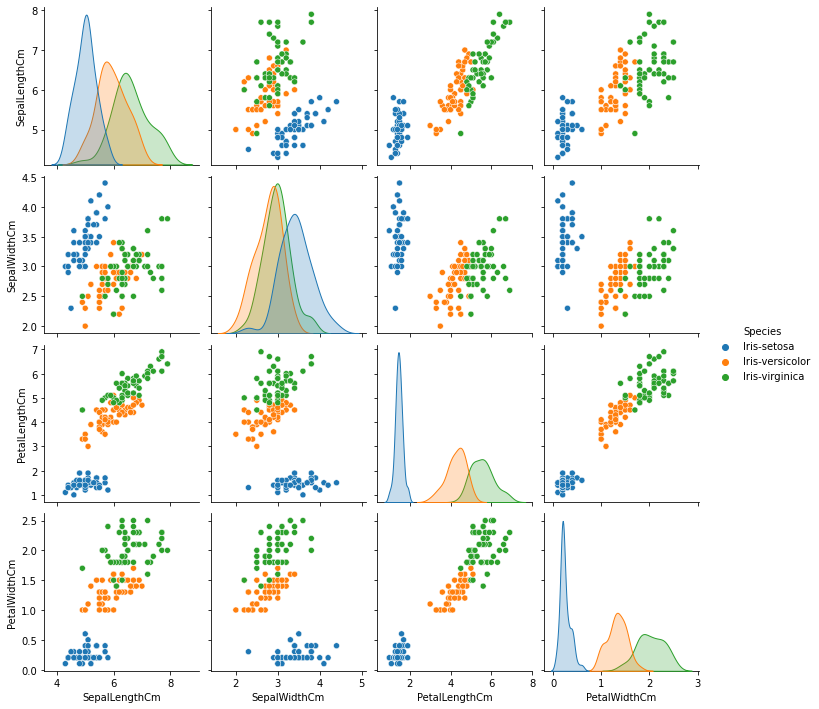

In [12]:
sns.pairplot(df,hue='Species');

In [13]:
import plotly.express as px

#### 3 Boyut olduğu için 4 sutun seçemezdim. Bu yüzden yüksek korele olan sutunlarımdan sadece birini seçerek grafiği çizdirdim. 👇

In [14]:
fig = px.scatter_3d(df, 
                    x='SepalLengthCm',
                    y='SepalWidthCm',
                    z='PetalWidthCm',
                    color='Species')
fig.show();

# MODEL SELECTİON

### TRAIN | TEST 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns="Species")
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

## Random Forest - Modelling and Model Performance


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import plot_confusion_matrix

In [18]:
rf_model = RandomForestClassifier(random_state=44)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [19]:
def train_val(y_train, y_train_pred, y_test, y_pred):

    scores = {"train set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred,average="macro"),
                            "Recall" : recall_score(y_train, y_train_pred,average="macro"),                          
                            "f1" : f1_score(y_train, y_train_pred,average="macro")},
    
              "test set": {"Accuracy" : accuracy_score(y_test,y_pred),
                           "Precision" : precision_score(y_test, y_pred,average="macro"),
                           "Recall" : recall_score(y_test, y_pred,average="macro"),                          
                           "f1" : f1_score(y_test, y_pred,average="macro")}}
    
    return pd.DataFrame(scores)


In [20]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train set,test set
Accuracy,1.0,0.977778
Precision,1.0,0.979167
Recall,1.0,0.976190
f1,1.0,0.976902


**Overfitting !**  ☝☝

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {"n_estimators": [10,20,50],
          "max_depth" :[None,2,4,8,10],
          "min_samples_split" :[2,3,6,9],
          "max_features" : ['auto',2,3,4],
          "random_state" : [44]}

In [23]:
rf_grid_model = GridSearchCV(rf_model, params, scoring = "accuracy", n_jobs = -1, cv=10).fit(X_train, y_train)

In [24]:
rf_grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 20,
 'random_state': 44}

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



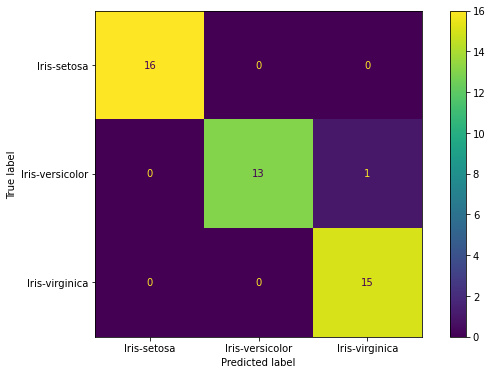

In [25]:
y_pred = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)


print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_grid_model,X_test,y_test);

In [26]:
train_val(y_train, y_pred_train, y_test, y_pred)

,train set,test set
Accuracy,0.980392,0.977778
Precision,0.981481,0.979167
Recall,0.981481,0.976190
f1,0.980952,0.976902


## SVM - Modelling and Model Performance

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
svm_model = SVC(random_state=44)
svm_model.fit(X_train_scaled,y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)

In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_pred_train, y_test, y_pred)

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



,train set,test set
Accuracy,0.970588,1.0
Precision,0.971429,1.0
Recall,0.971678,1.0
f1,0.971423,1.0


 ## Sonuç:

**- Random Forest eğitim sürecinde feature seçimini rastgele yapar ve herhangi bir feature 'a  büyük ölçüde bağlı değildir. Bu nedenle, Random Forest, verileri daha iyi genelleyebilir.**

**- Random Forest, datasetimizin orta veya büyük ölçekli olduğu durumlar için daha uygundur. Ancak birden fazla Decision Tree'yi birleştirdiğinden, yorumlanması daha zor hale gelir. Burada datasetimiz küçük ölçekli olduğu için SVM modelimiz daha iyi bir sonuç çıkarmıştır.**